In [14]:
from IPython.display import Image
import numpy as np

In [33]:
current_positions = [-2,2] #positions of the particles
current_forces = [0,0] #starting forces on the particles
velocities = [0,0]
forces = [0,0]
mass = [16,1]

new_positions = [0,0]
new_forces = [0,0]

save_positions = []

#iterations = 10000
#timestep = 0.005
# this works 
timestep = .001
# this not
timestep = 0.01

iterations = 1000

for i in range(iterations):

  #Save the current positions
  save_positions.append(current_positions.copy())

  #Update the positions
  for j in range(len(current_positions)):
    new_positions[j] = current_positions[j] + velocities[j]*timestep + (forces[j]/ (2*mass[j]) )*(timestep**2)


  #Find the total force on each particle
  for j in range(len(current_positions)):

    new_forces[j]=0

    for k in range(len(current_positions)):
      if j==k:
        continue

      distance = current_positions[j]-current_positions[k]
      sign = distance /abs(distance)

      new_forces[j] = new_forces[j]+10*(abs(distance)-5) * -sign

  #Update velocities
  for j in range(len(current_positions)):
    velocities[j] = velocities[j] + timestep*(forces[j] + new_forces[j])/(2*mass[j])

  #Set the force as the new forces
  for j in range(len(current_positions)):
    forces[j] = new_forces[j]

  #Set the new positions
  for j in range(len(current_positions)):
    current_positions[j]=new_positions[j]

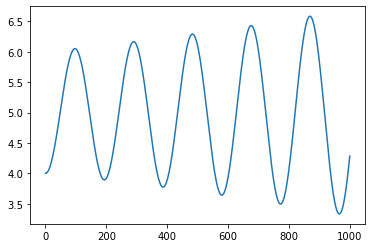

In [34]:
np.array(save_positions)
dist = np.diff(save_positions)
plt.plot(dist) 


In [ ]:
#Plot the evolution of the particle position and create a gif

from matplotlib import pyplot as plt
from celluloid import Camera

fig = plt.figure()
plt.xlim([-4, 4])
plt.ylim([-1,1])
camera = Camera(fig)
for i in range(len(save_positions)):    
    plt.scatter(save_positions[i],[0]*len(current_positions), s=120, c=[1]*len(current_positions))
    text = "T = " + str(round(timestep*i,2))
    plt.text(1, 0.5, text, ha='left',wrap=False)
    camera.snap()
    
animation = camera.animate()
animation.save('spring_gif.gif', writer = 'pillow', fps=40)

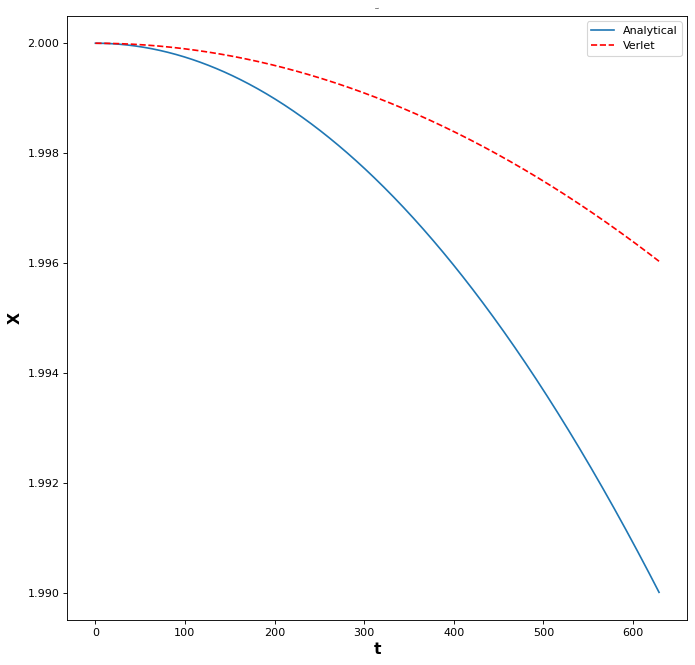

In [22]:
from numpy import zeros, linspace, pi, cos, array
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.pyplot import figure

figure(figsize=(10, 10), dpi=80)

omega = .1
N=5000
dt=0.001

simtime = 100

# calculate periodicity
T = round((2 * np.pi) / omega)

# We want to run 10 times the periodicity
N = T * 10
#t = linspace(0, 1, N)
u = zeros(N+1)
vi = zeros(N+1)

X_0 = 2
u[0] = X_0
vi[0] = 0

## Velocity Verlet
for n in range(N):
    v_next = vi[n] - 0.5*omega**2*u[n]*dt
    u[n+1]= u[n]+ dt*v_next
    vi[n+1] = v_next - 0.5*omega**2*u[n+1]*dt
    #np.append(u, x_next)

plt.plot(range(N), X_0*cos(omega*t), label = 'Analytical')
plt.plot(range(N), u[1:], 'r--', label = 'Verlet')
plt.title('Verlet', fontweight = 'bold', fontsize = 1)
plt.xlabel('t', fontweight = 'bold', fontsize = 14)
plt.ylabel('X', fontweight = 'bold', fontsize = 14)
plt.legend()
plt.show()